#### Description
This notebook analyzes the increase in area covered by Center Pivot Irrigation Systems (CPIS) in Africa between 2000 and 2021, comparing it to the total increase in irrigated land, and explores trends in Sub-Saharan Africa and arid regions.

In [10]:
# Import libraries and utility functions
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import sys
import os

# Add the project root to sys.path so we can import from Code.utils everywhere
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from Code.utils.utility import load_config, resolve_path, ssa_iso

# Load configuration
config = load_config()

def read(config_str):
    return pd.read_csv(resolve_path(config[config_str]))
def geo_read(config_str):
    return gpd.read_file(resolve_path(config[config_str]))

In [11]:
# Define Sub-Saharan Africa ISO list for filtering
sub_saharan_iso_list = ssa_iso

#### Calculate CPIS Area by Country and Year
Load CPIS shapefiles, reproject, calculate area, and prepare for analysis.

In [12]:
CPIS2000 = geo_read('SSA_CPIS_2000_shp_path').to_crs(epsg=3857)
CPIS2021 = geo_read('SSA_CPIS_2021_shp_path').to_crs(epsg=3857)

CPIS2000['Area_m2'] = CPIS2000.geometry.area
CPIS2021['Area_m2'] = CPIS2021.geometry.area
CPIS2000['Area_1000ha'] = CPIS2000['Area_m2'] / 10000000
CPIS2021['Area_1000ha'] = CPIS2021['Area_m2'] / 10000000

CPIS2000_csv = CPIS2000.drop(columns='geometry')
CPIS2021_csv = CPIS2021.drop(columns='geometry')
CPIS2000_csv['Year'] = 2000
CPIS2021_csv['Year'] = 2021
CPIS = pd.concat([CPIS2000_csv, CPIS2021_csv])

print(f"Total CPIS (1000ha) in 2000: {CPIS2000['Area_1000ha'].sum():.2f}")
print(f"Total CPIS (1000ha) in 2021: {CPIS2021['Area_1000ha'].sum():.2f}")

Total CPIS (1000ha) in 2000: 308.23
Total CPIS (1000ha) in 2021: 897.45


#### Compare CPIS and Total Irrigation Growth (Africa-wide)
Compute percent increases and CPIS share of total irrigation for Africa.

In [13]:
AQUA2000 = read('AQUA_AfricaIrrigation_2000')
AQUA2021 = read('AQUA_AfricaIrrigation_2021')
AQUAAll = read('AQUA_AfricaIrrigation')

total_area_2000_CPIS = CPIS2000['Area_1000ha'].sum()
total_area_2021_CPIS = CPIS2021['Area_1000ha'].sum()
total_area_2000_AQUA = AQUA2000['Value'].sum()
total_area_2021_AQUA = AQUA2021['Value'].sum()

ratio_2000 = 100 * total_area_2000_CPIS / total_area_2000_AQUA
ratio_2021 = 100 * total_area_2021_CPIS / total_area_2021_AQUA
percent_increase_AQUA = 100 * (total_area_2021_AQUA - total_area_2000_AQUA) / total_area_2000_AQUA
percent_increase_CPIS = 100 * (total_area_2021_CPIS - total_area_2000_CPIS) / total_area_2000_CPIS

print(f"Africa irrigation increased by {percent_increase_AQUA:.2f}% (2000-2021)")
print(f"Africa CPIS increased by {percent_increase_CPIS:.2f}% (2000-2021)")
print(f"CPIS share of irrigation: 2000 = {ratio_2000:.2f}%, 2021 = {ratio_2021:.2f}%")

Africa irrigation increased by 51.56% (2000-2021)
Africa CPIS increased by 191.16% (2000-2021)
CPIS share of irrigation: 2000 = 2.85%, 2021 = 5.48%


#### Compare CPIS and Total Irrigation Growth (Sub-Saharan Africa)
Compute percent increases and CPIS share of total irrigation for SSA.

In [14]:
AQUA2000_SSA = read('AQUA_SSAIrrigation_2000')
AQUA2021_SSA = read('AQUA_SSAIrrigation_2021')
AQUAAll_SSA = read('AQUA_SSAIrrigation')

CPIS2000_SSA = CPIS2000[CPIS2000['ISO'].isin(sub_saharan_iso_list)]
CPIS2021_SSA = CPIS2021[CPIS2021['ISO'].isin(sub_saharan_iso_list)]
CPIS_SSA = CPIS[CPIS['ISO'].isin(sub_saharan_iso_list)]

total_area_2000_CPIS_SSA = CPIS2000_SSA['Area_1000ha'].sum()
total_area_2021_CPIS_SSA = CPIS2021_SSA['Area_1000ha'].sum()
total_area_2000_AQUA_SSA = AQUA2000_SSA['Value'].sum()
total_area_2021_AQUA_SSA = AQUA2021_SSA['Value'].sum()

ratio_2000_SSA = 100 * total_area_2000_CPIS_SSA / total_area_2000_AQUA_SSA
ratio_2021_SSA = 100 * total_area_2021_CPIS_SSA / total_area_2021_AQUA_SSA
percent_increase_AQUA_SSA = 100 * (total_area_2021_AQUA_SSA - total_area_2000_AQUA_SSA) / total_area_2000_AQUA_SSA
percent_increase_CPIS_SSA = 100 * (total_area_2021_CPIS_SSA - total_area_2000_CPIS_SSA) / total_area_2000_CPIS_SSA

print(f"SSA irrigation increased by {percent_increase_AQUA_SSA:.2f}% (2000-2021)")
print(f"SSA CPIS increased by {percent_increase_CPIS_SSA:.2f}% (2000-2021)")
print(f"CPIS share of SSA irrigation: 2000 = {ratio_2000_SSA:.2f}%, 2021 = {ratio_2021_SSA:.2f}%")

SSA irrigation increased by 94.60% (2000-2021)
SSA CPIS increased by 191.16% (2000-2021)
CPIS share of SSA irrigation: 2000 = 6.81%, 2021 = 10.19%


#### Analyze AEI and CPIS in Arid Regions
Compare total AEI and CPIS area in arid regions for 2000 and 2015/2021.

In [15]:
AEI_2015 = geo_read('AEI_2015_All_shp_path').to_crs(epsg=3857)
AEI_2000 = geo_read('AEI_2000_All_shp_path').to_crs(epsg=3857)
AEI_2015['AEI_m2'] = AEI_2015['raster_val'] * 10000
AEI_2000['AEI_m2'] = AEI_2000['raster_val'] * 10000

total_AEI_2015_arid_m2 = AEI_2015['AEI_m2'].sum()
total_AEI_2000_arid_m2 = AEI_2000['AEI_m2'].sum()

arid_ssa_cpis = geo_read('SSA_Combined_CPIS_All_shp_path').to_crs(epsg=3857)
arid_ssa_cpis['Area_m2'] = arid_ssa_cpis.geometry.area
CPIS_2000_arid = arid_ssa_cpis[arid_ssa_cpis['Year'] == 2000]
CPIS_2021_arid = arid_ssa_cpis[arid_ssa_cpis['Year'] == 2021]
total_CPIS_2000_arid = CPIS_2000_arid['Area_m2'].sum()
total_CPIS_2021_arid = CPIS_2021_arid['Area_m2'].sum()

percent_CPIS_in_AEI_2000 = (total_CPIS_2000_arid / total_AEI_2000_arid_m2) * 100
percent_CPIS_in_AEI_2015 = (total_CPIS_2021_arid / total_AEI_2015_arid_m2) * 100

print(f"Arid region AEI: 2000 = {total_AEI_2000_arid_m2:.2f} m², 2015 = {total_AEI_2015_arid_m2:.2f} m²")
print(f"Arid region CPIS: 2000 = {total_CPIS_2000_arid:.2f} m², 2021 = {total_CPIS_2021_arid:.2f} m²")
print(f"CPIS share of AEI in arid: 2000 = {percent_CPIS_in_AEI_2000:.2f}%, 2015 = {percent_CPIS_in_AEI_2015:.2f}%")

Arid region AEI: 2000 = 111423222524.55 m², 2015 = 127604773469.65 m²
Arid region CPIS: 2000 = 3089283964.44 m², 2021 = 6627793953.72 m²
CPIS share of AEI in arid: 2000 = 2.77%, 2015 = 5.19%


#### Plot Trends in Irrigation and CPIS Area
Visualize the trends in total irrigation and CPIS area for Africa and SSA.

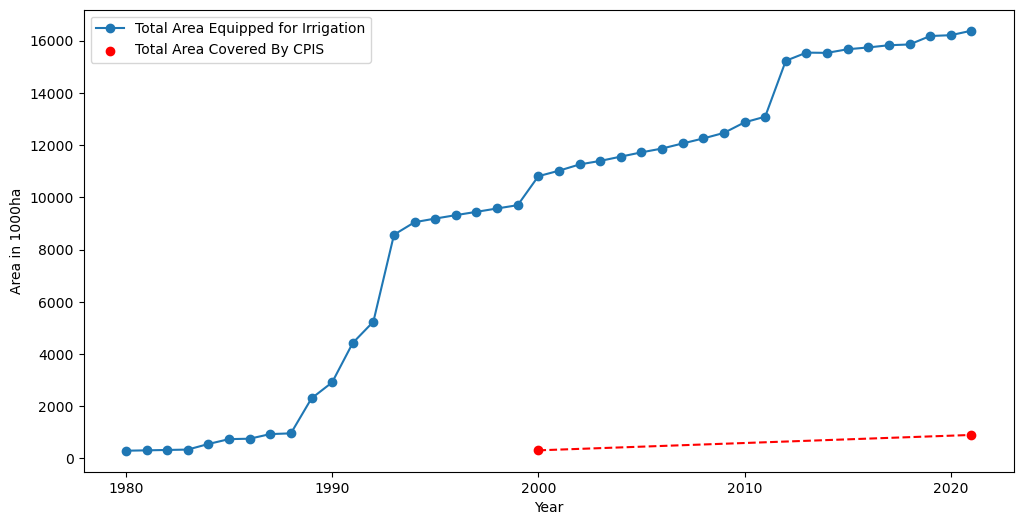

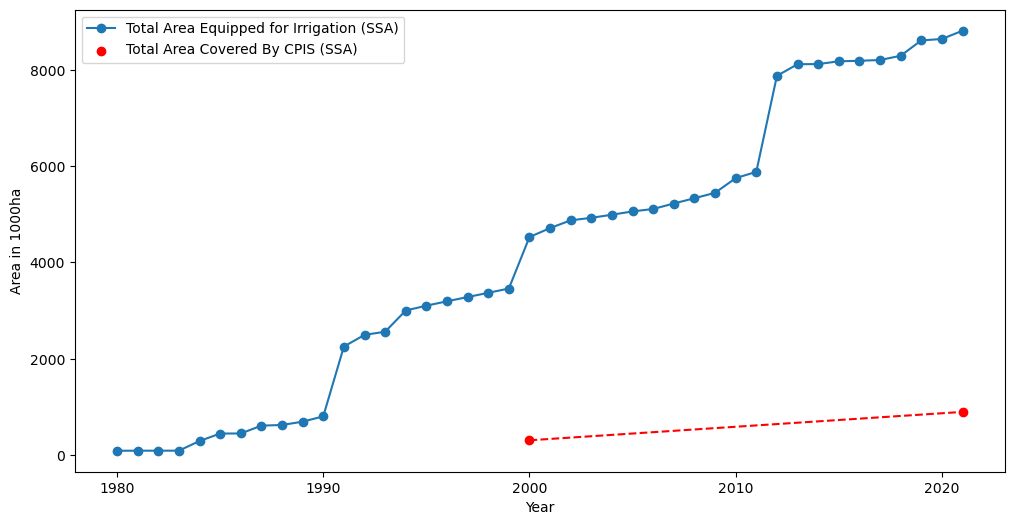

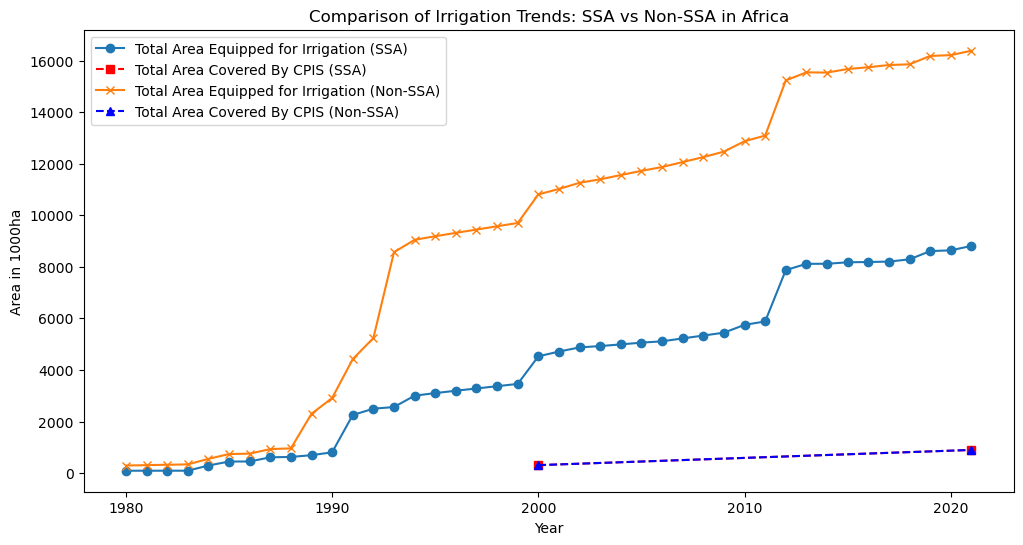

In [16]:
AQUA_yearly = AQUAAll.groupby('Year')['Value'].sum().reset_index()
CPIS_sum = CPIS_SSA.groupby('Year')['Area_1000ha'].sum().reset_index()
AQUA_yearly_SSA = AQUAAll_SSA.groupby('Year')['Value'].sum().reset_index()
CPIS_sum_SSA = CPIS_SSA.groupby('Year')['Area_1000ha'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(AQUA_yearly['Year'], AQUA_yearly['Value'], label='Total Area Equipped for Irrigation', marker='o')
plt.scatter(CPIS_sum['Year'], CPIS_sum['Area_1000ha'], color='red', label='Total Area Covered By CPIS')
plt.plot(CPIS_sum['Year'], CPIS_sum['Area_1000ha'], 'r--')
plt.xlabel('Year')
plt.ylabel('Area in 1000ha')
plt.legend()
plt.savefig(resolve_path(config['0_Figure1']))
plt.show()

plt.figure(figsize=(12,6))
plt.plot(AQUA_yearly_SSA['Year'], AQUA_yearly_SSA['Value'], label='Total Area Equipped for Irrigation (SSA)', marker='o')
plt.scatter(CPIS_sum_SSA['Year'], CPIS_sum_SSA['Area_1000ha'], color='red', label='Total Area Covered By CPIS (SSA)')
plt.plot(CPIS_sum_SSA['Year'], CPIS_sum_SSA['Area_1000ha'], 'r--')
plt.xlabel('Year')
plt.ylabel('Area in 1000ha')
plt.legend()
plt.savefig(resolve_path(config['0_Figure2']))
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(AQUA_yearly_SSA['Year'], AQUA_yearly_SSA['Value'], label='Total Area Equipped for Irrigation (SSA)', marker='o')
plt.plot(CPIS_sum_SSA['Year'], CPIS_sum_SSA['Area_1000ha'], 'r--', marker='s', label='Total Area Covered By CPIS (SSA)')
plt.plot(AQUA_yearly['Year'], AQUA_yearly['Value'], label='Total Area Equipped for Irrigation (Non-SSA)', marker='x')
plt.plot(CPIS_sum['Year'], CPIS_sum['Area_1000ha'], 'b--', marker='^', label='Total Area Covered By CPIS (Non-SSA)')
plt.xlabel('Year')
plt.ylabel('Area in 1000ha')
plt.title('Comparison of Irrigation Trends: SSA vs Non-SSA in Africa')
plt.legend()
plt.savefig(resolve_path(config['0_Figure3']))
plt.show()

#### Calculate again to see shift in G_AEI_1980 - G_AEI_2015 area
[G_AEI_#### data](https://zenodo.org/records/7809342)